# The name “Airbnb” stands for “Air Bed and Breakfast,”
# Airbnb, Inc. is an American San Francisco-based company operating an online marketplace for short- and long-term homestays and experiences. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [2]:
listing = pd.read_csv("listings.csv")
listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [3]:
calendar = pd.read_csv("calendar.csv")
calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Data Cleaning for Listing data

In [5]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
listing.shape

(3818, 92)

In [7]:
total_null_vals = listing.isnull().sum()
null_val_percent = (total_null_vals/ len(listing)) * 100
null_val_percent

id                                    0.000000
listing_url                           0.000000
scrape_id                             0.000000
last_scraped                          0.000000
name                                  0.000000
summary                               4.635935
space                                14.903091
description                           0.000000
experiences_offered                   0.000000
neighborhood_overview                27.029859
notes                                42.063908
transit                              24.463070
thumbnail_url                         8.381351
medium_url                            8.381351
picture_url                           0.000000
xl_picture_url                        8.381351
host_id                               0.000000
host_url                              0.000000
host_name                             0.052383
host_since                            0.052383
host_location                         0.209534
host_about   

**Dropping Unncessary Columns**

In [8]:
listing.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [9]:
listing.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'summary','experiences_offered','space', 'description',
                      'notes', 'transit', 'thumbnail_url', 'medium_url','picture_url','host_about','host_location',
                      'smart_location', 'xl_picture_url', 'host_url','host_thumbnail_url','country_code', 'country',
                      'host_picture_url','host_has_profile_pic','host_response_rate','host_is_superhost',
                      'host_neighbourhood','host_verifications','bed_type','neighbourhood',
                      'calendar_updated','calendar_last_scraped', "neighborhood_overview",'jurisdiction_names',"host_about",
                     "review_scores_accuracy", "review_scores_cleanliness","review_scores_checkin",
                      "review_scores_communication", "review_scores_location","review_scores_value",'reviews_per_month',
                      'requires_license','is_location_exact',
], inplace=True)

**Drop Columns with High Percentage of Missing Values:**

In [10]:
listing.drop(columns=['license', "square_feet","weekly_price","monthly_price"], inplace=True)

In [11]:
listing.shape

(3818, 47)

**Numeric Columns: Filling null values**

In [12]:
listing['security_deposit'].fillna(value = '$0.00', inplace = True)
listing['cleaning_fee'].fillna(value = '$0.00', inplace = True)
listing['host_listings_count'].fillna(listing['host_listings_count'].mean(), inplace=True)
listing['host_total_listings_count'].fillna(listing['host_total_listings_count'].mean(), inplace=True)
listing['review_scores_rating'].fillna(listing['review_scores_rating'].mean(), inplace=True)

**Categorical Columns: Filling null values for valid categorical columns with Unknown**

In [13]:
listing['host_response_time'].fillna(value = 'Unknown', inplace = True)
listing['host_acceptance_rate'].fillna(value = 'Unknown', inplace = True)

cat_null_to_mode = ['property_type','bathrooms','bedrooms','beds']
for column in cat_null_to_mode:
    listing[column].fillna(listing[column].mode()[0], inplace=True)

**Datetime Columns:**

**1) Filling host_since null values with mode**

**2) Dropping first_review and last_review columns**

In [14]:
listing['host_since'].fillna(listing['host_since'].mode()[0], inplace = True)
listing.drop(columns=['first_review', 'last_review'], inplace=True)

**Boolean Columns: Filling null values with False**

In [15]:
listing['host_identity_verified'].fillna(False, inplace = True)

**Crucial identifier missing:**

**Dropping Host_name rows having null values**

In [16]:
listing.dropna(subset=['host_name'], inplace=True)

**Handling zipcode null values as it is crucial**

In [17]:
rows_with_null_zipcode = listing[listing['zipcode'].isnull()]
rows_with_null_zipcode

,id,name,host_id,host_name,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
162,2039149,Walkable Seattle 3-bedroom Home,5325329,Blair,2013-03-04,within a few hours,100%,9.0,9.0,t,"Seattle, WA, United States",West Woodland,Ballard,Seattle,WA,NaN,Seattle,47.666868,-122.364031,House,Entire home/apt,10,2.0,3.0,3.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$225.00,$300.00,$100.00,8,$40.00,1,90,t,17,42,58,124,121,91.000000,t,strict,f,f,8
479,610989,Inn of Twin Gables - North Room,3029318,Katie,2012-07-23,Unknown,Unknown,1.0,1.0,t,"14th Avenue West, Seattle, WA, United States",North Queen Anne,Queen Anne,Seattle,WA,NaN,Seattle,47.649393,-122.375584,Bed & Breakfast,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$209.00,$0.00,$0.00,1,$0.00,2,1125,t,0,0,0,2,1,100.000000,f,strict,f,f,1
988,4172364,Blue Room,21649497,Jerome,2014-09-22,within an hour,100%,4.0,4.0,t,"-30th. Ave., Seattle, WA, United States",Leschi,Central Area,Seattle,WA,NaN,Seattle,47.604754,-122.294383,House,Private room,2,2.0,1.0,1.0,"{TV,""Wireless Internet"",Heating,""Smoke Detecto...",$55.00,$0.00,$0.00,1,$25.00,2,7,t,30,60,90,365,33,97.000000,f,flexible,f,f,4
1672,8355276,Downtown studio close to everything,22049520,Rilwan,2014-10-02,within an hour,100%,1.0,1.0,t,"Seattle, WA, United States",Yesler Terrace,Downtown,Seattle,WA,NaN,Seattle,47.604879,-122.322308,Apartment,Entire home/apt,3,1.0,0.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$65.00,$0.00,$40.00,2,$15.00,1,365,t,23,23,42,42,14,87.000000,t,flexible,f,f,1
1917,2134911,The Studio at Mibbett Hollow - Boat,4122018,Lynne,2012-11-11,within an hour,Unknown,3.0,3.0,t,"Seattle, WA, United States",Interbay,Interbay,Seattle,WA,NaN,Seattle,47.661186,-122.385344,Boat,Private room,1,1.0,1.0,1.0,"{TV,""Wireless Internet"",Kitchen,Breakfast,""Pet...",$95.00,$0.00,$20.00,1,$0.00,2,16,t,30,60,90,365,5,92.000000,f,strict,t,t,2
2521,2332949,Centrally located Roanoke Park home,640731,Dan And Natalia,2011-05-29,within an hour,100%,1.0,1.0,t,"Harvard Avenue East, Seattle, WA, United States",Portage Bay,Capitol Hill,Seattle,WA,NaN,Seattle,47.645867,-122.321416,House,Entire home/apt,10,3.0,4.0,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$380.00,$100.00,$100.00,8,$20.00,1,1125,t,30,60,90,347,38,95.000000,f,strict,f,f,1
2671,9774404,Bohemian Studio in Capitol Hill,18746557,Amanda,2014-07-23,Unknown,Unknown,1.0,1.0,f,"Seattle, WA, United States",Broadway,Capitol Hill,Seattle,WA,NaN,Seattle,47.617062,-122.325872,Apartment,Entire home/apt,2,1.0,0.0,1.0,"{""Wireless Internet"",Kitchen,""Smoking Allowed""...",$100.00,$0.00,$0.00,1,$0.00,1,1125,t,0,0,0,7,0,94.539262,f,flexible,f,f,1


In [18]:
listing.at[162, 'zipcode'] = 98107
listing.at[479, 'zipcode'] = 98119
listing.at[988, 'zipcode'] = 98122
listing.at[1672, 'zipcode'] = 98101
listing.at[1917, 'zipcode'] = 98199
listing.at[2521, 'zipcode'] = 98102
listing.at[2671, 'zipcode'] = 98102
listing.reset_index(drop=True, inplace=True)

In [19]:
total_null_vals = listing.isnull().sum()
null_val_percent = (total_null_vals/ len(listing)) * 100
null_val_percent

id                                  0.0
name                                0.0
host_id                             0.0
host_name                           0.0
host_since                          0.0
host_response_time                  0.0
host_acceptance_rate                0.0
host_listings_count                 0.0
host_total_listings_count           0.0
host_identity_verified              0.0
street                              0.0
neighbourhood_cleansed              0.0
neighbourhood_group_cleansed        0.0
city                                0.0
state                               0.0
zipcode                             0.0
market                              0.0
latitude                            0.0
longitude                           0.0
property_type                       0.0
room_type                           0.0
accommodates                        0.0
bathrooms                           0.0
bedrooms                            0.0
beds                                0.0


# Data Cleaning for Calendar Data

In [20]:
total_null_vals = calendar.isnull().sum()
null_val_percent = (total_null_vals/ len(calendar)) * 100
null_val_percent

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

In [21]:
calendar.drop(columns=['price'], inplace=True)

In [22]:
total_null_vals = calendar.isnull().sum()
null_val_percent = (total_null_vals/ len(calendar)) * 100
null_val_percent

listing_id    0.0
date          0.0
available     0.0
dtype: float64

# Data Cleaning for reivews Data

In [23]:
total_null_vals = reviews.isnull().sum()
null_val_percent = (total_null_vals/ len(reviews)) * 100
null_val_percent

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.021214
dtype: float64

In [24]:
reviews.drop(columns=['comments'], inplace=True)

In [25]:
for column in listing.columns:
    unique_values = listing[column].unique()
    print(f"Unique values for column '{column}':\n{unique_values}\n")

Unique values for column 'id':
[  241032   953595  3308979 ... 10267360  9604740 10208623]

Unique values for column 'name':
['Stylish Queen Anne Apartment' 'Bright & Airy Queen Anne Apartment'
 'New Modern House-Amazing water view' ...
 'Private apartment view of Lake WA' 'Amazing View with Modern Comfort!'
 'Large Lakefront Apartment']

Unique values for column 'host_id':
[  956883  5177328 16708587 ... 52791370 25522052 14703116]

Unique values for column 'host_name':
['Maija' 'Andrea' 'Jill' ... 'Flora' 'Eve' 'Virginia']

Unique values for column 'host_since':
['2011-08-11' '2013-02-21' '2014-06-12' ... '2011-03-27' '2015-12-30'
 '2014-04-25']

Unique values for column 'host_response_time':
['within a few hours' 'within an hour' 'Unknown' 'within a day'
 'a few days or more']

Unique values for column 'host_acceptance_rate':
['100%' 'Unknown' '0%']

Unique values for column 'host_listings_count':
[  3.   6.   2.   1.   5.   9.   4.  36. 354.   8.  37.   7.  34.  10.
  13.  21.  11.

In [26]:
alpha = listing.copy()
alpha['state'].replace('wa', 'WA', inplace = True)
alpha['amenities'] = alpha['amenities'].str.replace('[{}""]', '', regex=True)
alpha['security_deposit'] = pd.to_numeric(alpha['security_deposit'].str.replace('[\$,]', '', regex=True), errors='coerce')
alpha['price'] = pd.to_numeric(alpha['price'].str.replace('[\$,]', '', regex=True), errors='coerce')
alpha['cleaning_fee'] = pd.to_numeric(alpha['cleaning_fee'].str.replace('[\$,]', '', regex=True), errors='coerce')
alpha['extra_people'] = pd.to_numeric(alpha['extra_people'].str.replace('[\$,]', '', regex=True), errors='coerce')

In [27]:
alpha.head()

,id,name,host_id,host_name,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,241032,Stylish Queen Anne Apartment,956883,Maija,2011-08-11,within a few hours,100%,3.0,3.0,t,"Gilman Dr W, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Air Con...",85.0,0.0,0.0,2,5.0,1,365,t,14,41,71,346,207,95.000000,f,moderate,f,f,2
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,2013-02-21,within an hour,100%,6.0,6.0,t,"7th Avenue West, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,"TV,Internet,Wireless Internet,Kitchen,Free Par...",150.0,100.0,40.0,1,0.0,2,90,t,13,13,16,291,43,96.000000,f,strict,t,t,6
2,3308979,New Modern House-Amazing water view,16708587,Jill,2014-06-12,within a few hours,100%,2.0,2.0,t,"West Lee Street, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,"TV,Cable TV,Internet,Wireless Internet,Air Con...",975.0,1000.0,300.0,10,25.0,4,30,t,1,6,17,220,20,97.000000,f,strict,f,f,2
3,7421966,Queen Anne Chateau,9851441,Emily,2013-11-06,Unknown,Unknown,1.0,1.0,t,"8th Avenue West, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,"Internet,Wireless Internet,Kitchen,Indoor Fire...",100.0,0.0,0.0,1,0.0,1,1125,t,0,0,0,143,0,94.539262,f,flexible,f,f,1
4,278830,Charming craftsman 3 bdm house,1452570,Emily,2011-11-29,within an hour,Unknown,2.0,2.0,t,"14th Ave W, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",450.0,700.0,125.0,6,15.0,1,1125,t,30,60,90,365,38,92.000000,f,strict,f,f,1


**The information provided by the calendar and reviews datasets is redundant since the listing data encompasses all necessary details. Hence will not be working with calendar and reviews data futher**

In [28]:
#desktop_path = r'C:\Users\Mubasshira\Desktop'
#csv_path = desktop_path + '\\alpha_data.csv'

#alpha.to_csv(csv_path, index=False)

# I have developed a dashboard for visualization purposes. Please follow the link below to explore and analyze the visual representations of the data.

https://public.tableau.com/app/profile/mubasshira.quraishi/viz/AirbnbAirBedandBreakfastVisualization/AirbnbAnalysis

In [30]:
alpha.head(1)

,id,name,host_id,host_name,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,241032,Stylish Queen Anne Apartment,956883,Maija,2011-08-11,within a few hours,100%,3.0,3.0,t,"Gilman Dr W, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Air Con...",85.0,0.0,0.0,2,5.0,1,365,t,14,41,71,346,207,95.0,f,moderate,f,f,2


In [31]:
alpha['amenities'] = alpha['amenities'].str.replace('[{}]', '')  # Remove curly braces
alpha['amenities'] = alpha['amenities'].str.split(',')  # Split amenities by commas

# Explode the amenities into separate rows
exploded_amenities = alpha['amenities'].explode()

exploded_amenities

0                               TV
0                         Cable TV
0                         Internet
0                Wireless Internet
0                 Air Conditioning
0                          Kitchen
0                          Heating
0              Family/Kid Friendly
0                           Washer
0                            Dryer
1                               TV
1                         Internet
1                Wireless Internet
1                          Kitchen
1         Free Parking on Premises
1         Buzzer/Wireless Intercom
1                          Heating
1              Family/Kid Friendly
1                           Washer
1                            Dryer
1                   Smoke Detector
1         Carbon Monoxide Detector
1                    First Aid Kit
1                      Safety Card
1                Fire Extinguisher
1                       Essentials
2                               TV
2                         Cable TV
2                   

In [32]:
dummies = pd.get_dummies(alpha['amenities'].explode(), prefix='amenity')
dummies = dummies.astype(int)

# Concatenate
alpha = pd.concat([alpha, dummies.groupby(level=0).max()], axis=1)
alpha.drop('amenities', axis=1, inplace=True)

In [33]:
alpha.head()

,id,name,host_id,host_name,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,amenity_,amenity_24-Hour Check-in,amenity_Air Conditioning,amenity_Breakfast,amenity_Buzzer/Wireless Intercom,amenity_Cable TV,amenity_Carbon Monoxide Detector,amenity_Cat(s),amenity_Dog(s),amenity_Doorman,amenity_Dryer,amenity_Elevator in Building,amenity_Essentials,amenity_Family/Kid Friendly,amenity_Fire Extinguisher,amenity_First Aid Kit,amenity_Free Parking on Premises,amenity_Gym,amenity_Hair Dryer,amenity_Hangers,amenity_Heating,amenity_Hot Tub,amenity_Indoor Fireplace,amenity_Internet,amenity_Iron,amenity_Kitchen,amenity_Laptop Friendly Workspace,amenity_Lock on Bedroom Door,amenity_Other pet(s),amenity_Pets Allowed,amenity_Pets live on this property,amenity_Pool,amenity_Safety Card,amenity_Shampoo,amenity_Smoke Detector,amenity_Smoking Allowed,amenity_Suitable for Events,amenity_TV,amenity_Washer,amenity_Washer / Dryer,amenity_Wheelchair Accessible,amenity_Wireless Internet
0,241032,Stylish Queen Anne Apartment,956883,Maija,2011-08-11,within a few hours,100%,3.0,3.0,t,"Gilman Dr W, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,85.0,0.0,0.0,2,5.0,1,365,t,14,41,71,346,207,95.000000,f,moderate,f,f,2,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,2013-02-21,within an hour,100%,6.0,6.0,t,"7th Avenue West, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,150.0,100.0,40.0,1,0.0,2,90,t,13,13,16,291,43,96.000000,f,strict,t,t,6,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,3308979,New Modern House-Amazing water view,16708587,Jill,2014-06-12,within a few hours,100%,2.0,2.0,t,"West Lee Street, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,975.0,1000.0,300.0,10,25.0,4,30,t,1,6,17,220,20,97.000000,f,strict,f,f,2,0,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
3,7421966,Queen Anne Chateau,9851441,Emily,2013-11-06,Unknown,Unknown,1.0,1.0,t,"8th Avenue West, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,100.0,0.0,0.0,1,0.0,1,1125,t,0,0,0,143,0,94.539262,f,flexible,f,f,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1
4,278830,Charming craftsman 3 bdm house,1452570,Emily,2011-11-29,within an hour,Unknown,2.0,2.0,t,"14th Ave W, Seattle, WA 98119, United States",West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,450.0,700.0,125.0,6,15.0,1,1125,t,30,60,90,365,38,92.000000,f,strict,f,f,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1


In [34]:
from sklearn.preprocessing import LabelEncoder 

In [35]:
le = LabelEncoder()
req_obj_cols = ['neighbourhood_cleansed','property_type', 'room_type']
alpha[req_obj_cols] = alpha[req_obj_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [36]:
alpha.head()

,id,name,host_id,host_name,host_since,host_response_time,host_acceptance_rate,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,amenity_,amenity_24-Hour Check-in,amenity_Air Conditioning,amenity_Breakfast,amenity_Buzzer/Wireless Intercom,amenity_Cable TV,amenity_Carbon Monoxide Detector,amenity_Cat(s),amenity_Dog(s),amenity_Doorman,amenity_Dryer,amenity_Elevator in Building,amenity_Essentials,amenity_Family/Kid Friendly,amenity_Fire Extinguisher,amenity_First Aid Kit,amenity_Free Parking on Premises,amenity_Gym,amenity_Hair Dryer,amenity_Hangers,amenity_Heating,amenity_Hot Tub,amenity_Indoor Fireplace,amenity_Internet,amenity_Iron,amenity_Kitchen,amenity_Laptop Friendly Workspace,amenity_Lock on Bedroom Door,amenity_Other pet(s),amenity_Pets Allowed,amenity_Pets live on this property,amenity_Pool,amenity_Safety Card,amenity_Shampoo,amenity_Smoke Detector,amenity_Smoking Allowed,amenity_Suitable for Events,amenity_TV,amenity_Washer,amenity_Washer / Dryer,amenity_Wheelchair Accessible,amenity_Wireless Internet
0,241032,Stylish Queen Anne Apartment,956883,Maija,2011-08-11,within a few hours,100%,3.0,3.0,t,"Gilman Dr W, Seattle, WA 98119, United States",81,Queen Anne,Seattle,WA,98119,Seattle,47.636289,-122.371025,0,0,4,1.0,1.0,1.0,85.0,0.0,0.0,2,5.0,1,365,t,14,41,71,346,207,95.000000,f,moderate,f,f,2,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,2013-02-21,within an hour,100%,6.0,6.0,t,"7th Avenue West, Seattle, WA 98119, United States",81,Queen Anne,Seattle,WA,98119,Seattle,47.639123,-122.365666,0,0,4,1.0,1.0,1.0,150.0,100.0,40.0,1,0.0,2,90,t,13,13,16,291,43,96.000000,f,strict,t,t,6,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,3308979,New Modern House-Amazing water view,16708587,Jill,2014-06-12,within a few hours,100%,2.0,2.0,t,"West Lee Street, Seattle, WA 98119, United States",81,Queen Anne,Seattle,WA,98119,Seattle,47.629724,-122.369483,9,0,11,4.5,5.0,7.0,975.0,1000.0,300.0,10,25.0,4,30,t,1,6,17,220,20,97.000000,f,strict,f,f,2,0,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
3,7421966,Queen Anne Chateau,9851441,Emily,2013-11-06,Unknown,Unknown,1.0,1.0,t,"8th Avenue West, Seattle, WA 98119, United States",81,Queen Anne,Seattle,WA,98119,Seattle,47.638473,-122.369279,0,0,3,1.0,0.0,2.0,100.0,0.0,0.0,1,0.0,1,1125,t,0,0,0,143,0,94.539262,f,flexible,f,f,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1
4,278830,Charming craftsman 3 bdm house,1452570,Emily,2011-11-29,within an hour,Unknown,2.0,2.0,t,"14th Ave W, Seattle, WA 98119, United States",81,Queen Anne,Seattle,WA,98119,Seattle,47.632918,-122.372471,9,0,6,2.0,3.0,3.0,450.0,700.0,125.0,6,15.0,1,1125,t,30,60,90,365,38,92.000000,f,strict,f,f,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1


In [37]:
host_stats = alpha.groupby('host_name')['price'].agg(['mean', 'median', 'count']).reset_index()

host_stats.columns = ['host_name', 'mean_price', 'median_price', 'listing_count']
host_stats

,host_name,mean_price,median_price,listing_count
0,Aaron,93.500000,96.5,8
1,Abby,130.000000,140.0,3
2,Abe,56.000000,56.0,1
3,Abigail,95.000000,95.0,1
4,Abigail & Justin,75.000000,75.0,1
5,Ada,75.000000,75.0,1
6,Adam,115.777778,125.0,9
7,Adin & Lynda,65.000000,65.0,1
8,Adriaan,130.000000,130.0,1
9,Adrian,147.500000,147.5,2


In [38]:
alpha = pd.merge(alpha, host_stats, on='host_name', how='left')

<Axes: >

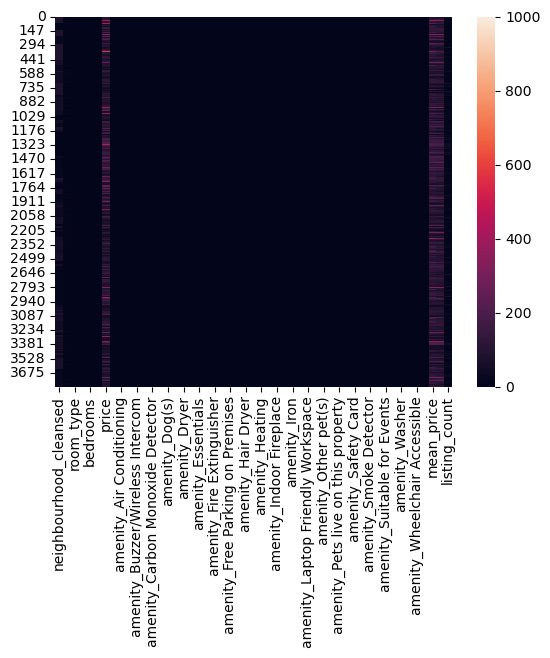

In [40]:
# Independent Variables
for_map = alpha[['neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds','price',
            'amenity_24-Hour Check-in', 'amenity_Air Conditioning',
            'amenity_Breakfast', 'amenity_Buzzer/Wireless Intercom',
            'amenity_Cable TV', 'amenity_Carbon Monoxide Detector',
            'amenity_Cat(s)', 'amenity_Dog(s)', 'amenity_Doorman', 'amenity_Dryer',
            'amenity_Elevator in Building', 'amenity_Essentials',
            'amenity_Family/Kid Friendly', 'amenity_Fire Extinguisher',
            'amenity_First Aid Kit', 'amenity_Free Parking on Premises',
            'amenity_Gym', 'amenity_Hair Dryer', 'amenity_Hangers',
            'amenity_Heating', 'amenity_Hot Tub', 'amenity_Indoor Fireplace',
            'amenity_Internet', 'amenity_Iron', 'amenity_Kitchen',
            'amenity_Laptop Friendly Workspace', 'amenity_Lock on Bedroom Door',
            'amenity_Other pet(s)', 'amenity_Pets Allowed',
            'amenity_Pets live on this property', 'amenity_Pool',
            'amenity_Safety Card', 'amenity_Shampoo', 'amenity_Smoke Detector',
            'amenity_Smoking Allowed', 'amenity_Suitable for Events', 'amenity_TV',
            'amenity_Washer', 'amenity_Washer / Dryer',
            'amenity_Wheelchair Accessible', 'amenity_Wireless Internet',
            'mean_price', 'median_price', 'listing_count']]

sns.heatmap(for_map)

In [41]:
for_map.corr()

,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,beds,price,amenity_24-Hour Check-in,amenity_Air Conditioning,amenity_Breakfast,amenity_Buzzer/Wireless Intercom,amenity_Cable TV,amenity_Carbon Monoxide Detector,amenity_Cat(s),amenity_Dog(s),amenity_Doorman,amenity_Dryer,amenity_Elevator in Building,amenity_Essentials,amenity_Family/Kid Friendly,amenity_Fire Extinguisher,amenity_First Aid Kit,amenity_Free Parking on Premises,amenity_Gym,amenity_Hair Dryer,amenity_Hangers,amenity_Heating,amenity_Hot Tub,amenity_Indoor Fireplace,amenity_Internet,amenity_Iron,amenity_Kitchen,amenity_Laptop Friendly Workspace,amenity_Lock on Bedroom Door,amenity_Other pet(s),amenity_Pets Allowed,amenity_Pets live on this property,amenity_Pool,amenity_Safety Card,amenity_Shampoo,amenity_Smoke Detector,amenity_Smoking Allowed,amenity_Suitable for Events,amenity_TV,amenity_Washer,amenity_Washer / Dryer,amenity_Wheelchair Accessible,amenity_Wireless Internet,mean_price,median_price,listing_count
neighbourhood_cleansed,1.000000,0.192924,0.111716,0.034960,0.061157,0.019873,-0.031704,-0.049428,-0.112744,0.060099,-0.155822,-0.032246,-0.037337,0.045189,0.058944,-0.102195,-0.026979,-0.283740,-0.025246,-0.006449,0.026214,0.029040,0.133416,-0.226585,-0.083384,-0.066301,0.024944,-0.122820,0.065689,-0.043924,-0.080695,-0.051718,-0.033470,0.047806,0.011635,0.002488,0.087219,-0.167537,-0.023728,-0.064945,0.010483,-0.003642,0.025011,-0.079665,-0.029013,0.007719,-0.090961,0.035476,-0.064489,-0.062456,-0.046495
property_type,0.192924,1.000000,0.273398,0.243370,0.285670,0.163868,0.045176,-0.040992,-0.091041,0.038468,-0.291669,-0.021270,0.009046,0.082320,0.076868,-0.123705,-0.017142,-0.442018,-0.026041,0.080170,0.100326,0.149713,0.277385,-0.252543,-0.064688,-0.045785,0.005785,-0.039062,0.245004,-0.013717,-0.074947,-0.137523,-0.031557,0.103415,0.039362,0.070650,0.136353,-0.162826,0.007273,-0.023342,0.023735,0.042217,0.075715,-0.081891,-0.020322,-0.002121,-0.183545,0.050087,-0.027174,-0.055081,-0.087925
room_type,0.111716,0.273398,1.000000,-0.099250,-0.235163,-0.344229,-0.430066,-0.107491,-0.079375,0.189092,-0.082794,-0.214387,-0.073525,0.110383,0.058449,-0.064934,-0.042501,-0.155837,-0.063527,-0.270514,-0.024323,0.111426,-0.023071,-0.119743,-0.114855,-0.110363,-0.049334,-0.038822,0.065026,-0.056156,-0.128088,-0.194949,-0.107242,0.180174,0.026846,-0.088825,0.137068,-0.072862,-0.049583,-0.082329,-0.060169,0.076916,0.066125,-0.259737,-0.041436,-0.015449,-0.099462,-0.021944,-0.335922,-0.349372,0.042627
bathrooms,0.034960,0.243370,-0.099250,1.000000,0.610762,0.532171,0.516284,0.012711,0.057678,-0.010433,-0.058873,0.155769,0.055351,-0.044074,-0.037380,0.016013,0.146867,-0.065966,-0.019889,0.180176,0.093591,0.039131,0.146558,0.004164,0.003503,0.001663,0.031352,0.079212,0.225127,0.060855,0.012295,0.078250,0.001867,-0.037160,-0.008457,0.044537,-0.059850,0.037592,0.006023,-0.012103,0.049986,0.002458,0.121872,0.130981,0.142541,-0.010044,-0.041852,0.045695,0.321107,0.290996,0.046597
bedrooms,0.061157,0.285670,-0.235163,0.610762,1.000000,0.753165,0.627972,0.013561,0.037609,-0.069946,-0.113910,0.211445,0.053437,-0.047010,-0.017985,-0.009799,0.173103,-0.137402,-0.025274,0.331882,0.114544,0.050326,0.227344,-0.031273,-0.001341,-0.015707,0.037800,0.057962,0.257276,0.079359,0.003025,0.096999,-0.002918,-0.049745,0.011143,0.107125,-0.043407,0.006067,0.036040,0.003805,0.052039,-0.039368,0.077174,0.184773,0.173111,0.004990,-0.041971,0.044860,0.407193,0.384815,-0.017015
beds,0.019873,0.163868,-0.344229,0.532171,0.753165,1.000000,0.589377,0.054178,0.084070,-0.081504,-0.066581,0.239957,0.081445,-0.070493,-0.039514,0.011303,0.151070,-0.062056,0.010020,0.364681,0.117429,0.045039,0.181524,0.014824,0.062598,0.047320,0.055371,0.095374,0.169475,0.087529,0.070892,0.118954,0.049184,-0.079989,0.006980,0.128400,-0.082089,0.057595,0.069122,0.030457,0.062401,-0.036984,0.112452,0.180594,0.146090,-0.004735,-0.001661,0.049637,0.386860,0.362768,0.029963
price,-0.031704,0.045176,-0.430066,0.516

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
# Independent Variables
IV = alpha[['neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds',
            'amenity_24-Hour Check-in', 'amenity_Air Conditioning',
            'amenity_Breakfast', 'amenity_Buzzer/Wireless Intercom',
            'amenity_Cable TV', 'amenity_Carbon Monoxide Detector',
            'amenity_Cat(s)', 'amenity_Dog(s)', 'amenity_Doorman', 'amenity_Dryer',
            'amenity_Elevator in Building', 'amenity_Essentials',
            'amenity_Family/Kid Friendly', 'amenity_Fire Extinguisher',
            'amenity_First Aid Kit', 'amenity_Free Parking on Premises',
            'amenity_Gym', 'amenity_Hair Dryer', 'amenity_Hangers',
            'amenity_Heating', 'amenity_Hot Tub', 'amenity_Indoor Fireplace',
            'amenity_Internet', 'amenity_Iron', 'amenity_Kitchen',
            'amenity_Laptop Friendly Workspace', 'amenity_Lock on Bedroom Door',
            'amenity_Other pet(s)', 'amenity_Pets Allowed',
            'amenity_Pets live on this property', 'amenity_Pool',
            'amenity_Safety Card', 'amenity_Shampoo', 'amenity_Smoke Detector',
            'amenity_Smoking Allowed', 'amenity_Suitable for Events', 'amenity_TV',
            'amenity_Washer', 'amenity_Washer / Dryer',
            'amenity_Wheelchair Accessible', 'amenity_Wireless Internet',
            'mean_price', 'median_price', 'listing_count']]

X = IV
y = alpha[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling and feature Selection

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_features = 20  
selector = SelectKBest(f_regression, k=num_features)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_feature_names = X_train.columns[selector.get_support()]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['room_type', 'bathrooms', 'bedrooms', 'beds',
       'amenity_Air Conditioning', 'amenity_Breakfast', 'amenity_Cable TV',
       'amenity_Doorman', 'amenity_Dryer', 'amenity_Family/Kid Friendly',
       'amenity_Gym', 'amenity_Hot Tub', 'amenity_Indoor Fireplace',
       'amenity_Kitchen', 'amenity_Pets live on this property', 'amenity_Pool',
       'amenity_TV', 'amenity_Washer', 'mean_price', 'median_price'],
      dtype='object')


C:\Users\Mubasshira\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train_scaled, y_train)

y_pred = xg_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4480.667589176085
R-squared: 0.46307063171715124


# Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV
xg_reg = xgb.XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_selected, y_train)
print("Best parameters found: ", grid_search.best_params_)


best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}
Mean Squared Error:  2558.147130508851


In [51]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.6934509656380758


# Testing

In [53]:
columns = ['room_type', 'bathrooms', 'bedrooms', 'beds',
           'amenity_Air Conditioning', 'amenity_Breakfast', 'amenity_Cable TV',
           'amenity_Doorman', 'amenity_Dryer', 'amenity_Family/Kid Friendly',
           'amenity_Gym', 'amenity_Hot Tub', 'amenity_Indoor Fireplace',
           'amenity_Kitchen', 'amenity_Pets live on this property', 'amenity_Pool',
           'amenity_TV', 'amenity_Washer', 'mean_price', 'median_price']

random_data = pd.DataFrame([[1, 1.5, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 100, 80]],
                           columns=columns)

predicted_price = best_xgb.predict(random_data)

# Display the predicted price
print("Predicted Price:", predicted_price)

Predicted Price: [541.86816]
